<div class="alert alert-block alert-warning"><p><h1><center>Data Pyrates (Team 1)</center></h1> </p></div>




<font color=orange>**Python Hackathon April 2023**</center></font>

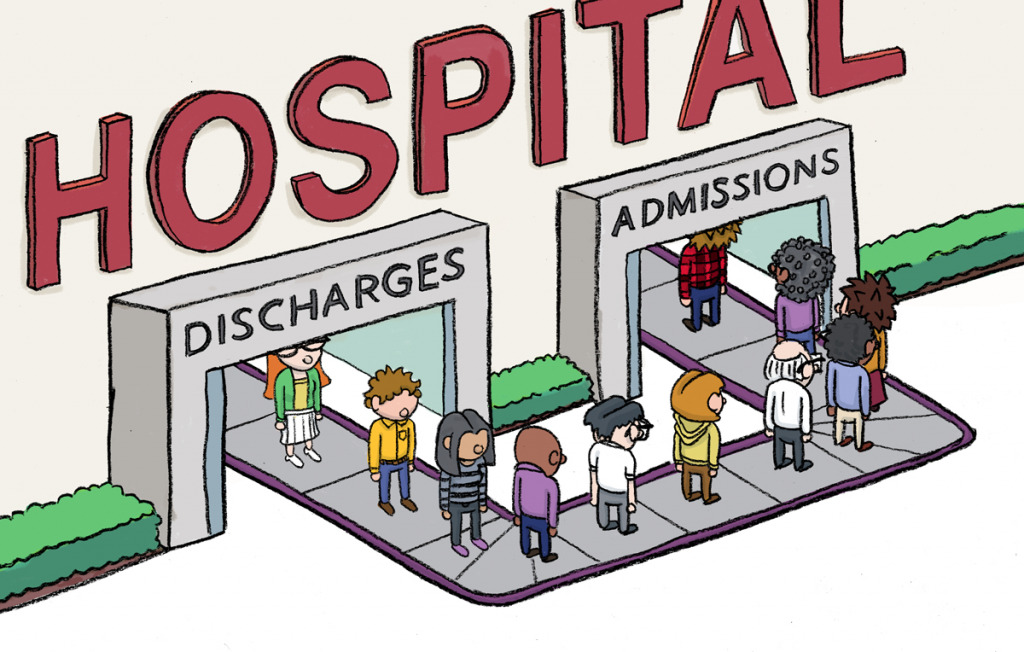

**Table of Content**
- [x] Introduction to workspace
- [x] Data and Methods
- [x] Hackathon Problem Statements (1-80)

# Introduction to dataset

The dataset is classified into seven heads: Patients, ED Visits, Ambulatory Visit, ReAdmission Registry, Discharges, Providers, ED Unique. It contains admission date, discharge date, provider ID, etc., etc. Some of the column labels from each category is mentioned below:  

- "PatientID" - Patients idenfication 
- "Visit Type"- type of appointments scheduled to the hospital eg:, Physical, Follow Up, Telemedicine, 
- "ED Dispostion" - Disposition (admission or discharge) is, of course, the ultimate endpoint for all emergency department visits
- "Discharge Disposiiton" - The disposition of the patient at time of discharge (i.e., discharged to home, expired, and transfer)
- "Primary Diagnosis" - Primary Diagnosis means the main condition treated or investigated during the relevant episode of -healthcare.
- "Expected LOS" - Expected length of stay in hospital
- "Expected Mortality" - predicted number of deaths in the hospital 
- "ReAdmission Flag" - Value =1 indicate patients at higher risk of readmission 
- "Service" - Different levels of hopsital units like ICU, Orthopeadics, General Medicine, Neurology, Primary Care
- "Provider Speciality" - Department to which providers/doctors belong to.


## Data and Methods

In [95]:
# pip install panda
# pip install matplotlib
# pip install numpy
# pip install seaborn
# pip install colorama
# !pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("HospitalDatabase.xlsx")
df_PA = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Patients")
df_ED = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
df_AmbV = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "AmbulatoryVisits")
df_ReAd = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
df_Dis = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Discharges")
df_Pro = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "Providers")
df_EDU = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDUnique")


**Methods**
1. Data Validation: Checked the data type, format, duplicate or redundant data, null or missing values 
2. Data Visualization: Employed Matplotlib and Seaborn to create various plots, including barplots, lineplots, and heat maps, to identify patterns and relationships. 

In [4]:
df_PA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PatientID    945 non-null    int64         
 1   FirstName    945 non-null    object        
 2   LastName     945 non-null    object        
 3   DateOfBirth  945 non-null    datetime64[ns]
 4   Gender       945 non-null    object        
 5   Race         945 non-null    object        
 6   Language     937 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 51.8+ KB


In [5]:
df.describe()

,PatientID
count,945.000000
mean,473.000000
std,272.942302
min,1.000000
25%,237.000000
50%,473.000000
75%,709.000000
max,945.000000


**Checking for unwanted or special charaters entries-,?,#,*,etc.**

In [6]:

for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

PatientID : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  46
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

# Null Values 

In [7]:
df.isnull().sum() 

PatientID      0
FirstName      0
LastName       0
DateOfBirth    0
Gender         0
Race           0
Language       8
dtype: int64

In [8]:
df_ReAd.isnull().sum()

AdmissionID                    0
PatientID                      0
AdmissionDate                  0
DischargeDate                  0
DischargeDisposition           0
Service                        0
PrimaryDiagnosis               0
ExpectedLOS                    0
ExpectedMortality              0
ReadmissionFlag              526
DaysToReadmission            526
EDVisitAfterDischargeFlag    379
dtype: int64

**There are 8 null values in Patient Table's language column. In the ReAdmission Registry, there are 526 null values in Readmission Flag and DaysToReadmission  each, and 379 in EDVisitAfterDischargeFlag.**

# Hackathon Problem Statements

<span style="color:#00008B;"> Q1: Calculate the time spent in ED Department for each visit. <span>

In [9]:
from datetime import datetime
time_in = df_ED['VisitDate']
time_out = df_ED['EDDischargeTime']

time_in_datetime_object = pd.to_datetime(time_in)
time_out_datetime_object = pd.to_datetime(time_out)

diff_time = time_in_datetime_object - time_out_datetime_object
print(diff_time)

0      -1 days +12:39:37.076000
1      -1 days +00:45:39.785000
2      -1 days +22:09:03.849000
3      -1 days +22:39:50.207000
4      -1 days +21:21:39.957000
                 ...           
1194   -1 days +08:06:50.547000
1195   -1 days +01:32:55.970000
1196   -1 days +19:29:56.455000
1197   -1 days +17:49:24.946000
1198   -1 days +13:10:33.419000
Length: 1199, dtype: timedelta64[ns]


<span style="color:#00008B;">  Q2: Get the  number of patients based on service and primary diagnosis.  <span>

In [10]:
#2 from datetime import datetime

df_ReAd = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")

result = df_ReAd.groupby(['Service','PrimaryDiagnosis'])['PatientID'].nunique()
print(result)

Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          34
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

<span style="color:#00008B;"> Q3: Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition. </font><span >

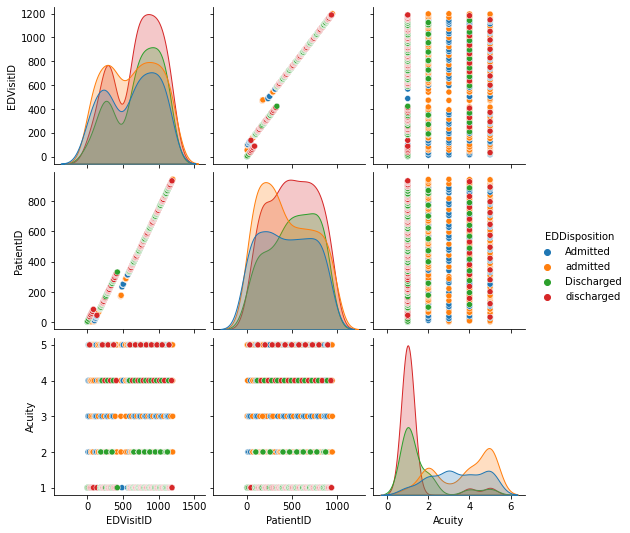

In [11]:
sns.pairplot(df_EDU, hue="EDDisposition")

<span style="color:#00008B;"> Q4: Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.  <span>

In [12]:

(Attach screenshots for this question)

SyntaxError: invalid syntax (1057881584.py, line 1)

<span style="color:#00008B;"> Q5: Create a bar chart between expectedLOS & Primary diagnosis. <span>

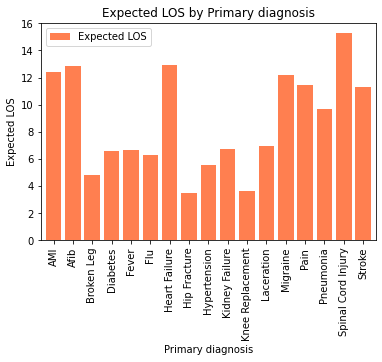

In [16]:
#df_Dis.plot(x = "ExpectedLOS", y = "PrimaryDiagnosis", kind = "bar")
#plt.show()


grouped_df = df_Dis.groupby("PrimaryDiagnosis")["ExpectedLOS"].mean()
grouped_df.plot(kind="bar", color="coral", width=0.8, label="Expected LOS")
plt.xlabel("Primary diagnosis")
plt.ylabel("Expected LOS")
plt.title("Expected LOS by Primary diagnosis")
plt.legend()
plt.show()


<span style="color:#00008B;"> Q6. Find the last name of the patients, by getting the first name from the user.  <span>

In [ ]:
first_name = input("Enter first name: ")
last_name = df_PA.loc[df_PA['FirstName'] == first_name]['LastName'].values[0]
print(last_name)


<span style="color:#00008B;"> Q7:Find the list of patients whose ExpectedLOS is greater than the value given by the user. <span>

In [25]:
user_input = int(input("Enter expected LOS: "))


#filtered_df = df_Dis(['ExpectedLOS'] > user_input)
filtered_df = df_Dis[df_Dis['ExpectedLOS'] > user_input]

print(filtered_df)




Enter expected LOS: 9
     AdmissionID  PatientID AdmissionDate           DischargeDate  \
0              1          9    2018-01-01 2018-01-07 18:06:06.408   
3            361        102    2018-01-07 2018-01-15 04:48:33.134   
12           398        134    2018-01-10 2018-01-15 16:43:47.026   
16           399        147    2018-01-11 2018-01-16 10:31:32.129   
18           263        156    2018-01-12 2018-01-16 05:36:13.111   
..           ...        ...           ...                     ...   
708          708        686    2018-02-20 2018-03-02 21:11:23.954   
710          702        689    2018-02-20 2018-03-05 10:04:44.025   
715          715        716    2018-02-21 2018-03-06 03:31:05.262   
716          698        723    2018-02-22 2018-02-26 15:09:02.584   
718          716        733    2018-02-22 2018-03-05 12:31:55.958   

    DischargeDisposition     Service PrimaryDiagnosis  ExpectedLOS  \
0                Expired  Cardiology              AMI     9.646857   
3        

<span style="color:#00008B;">  Q8 Using Sunburst chart display the providers name by thier provider speciality, considering thier experience.
 <span>

In [ ]:
import plotly.express as px

df_Pro["ProviderDateOnStaff"] = pd.to_datetime(df_Pro["ProviderDateOnStaff"])

df_Pro["DaysOnStaff"] = (pd.Timestamp.now() - df_Pro["ProviderDateOnStaff"]).dt.days

fig = px.sunburst(
    df_Pro,
    path=["ProviderSpecialty", "ProviderName"],
    values="DaysOnStaff",
)

fig.update_layout(title_text="Providers by Specialty and Join Date")

fig.show()


<span style="color:#00008B;"> Q9 Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with 
object <span>

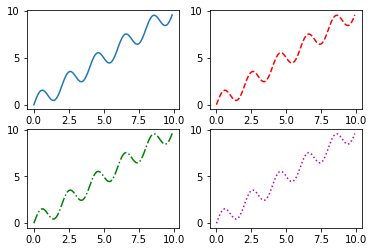

In [22]:
# Creating x and y arrays
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

# Creating a figure and an array of axes objects
fig, ax = plt.subplots(2, 2)

# Plotting the data on each axes object
ax[0, 0].plot(x, y)
ax[0, 1].plot(x, y, 'r--')
ax[1, 0].plot(x, y, 'g-.')
ax[1, 1].plot(x, y, 'm:')

# Showing the figure
plt.show()

<span style="color:#00008B;"> Q10 Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).
 <span>

In [24]:
df_EDU.groupby(['ReasonForVisit', 'EDDisposition']).size().unstack(fill_value=0)

EDDisposition,Admitted,Discharged,admitted,discharged
ReasonForVisit,,,,
Accident,0,0,37,0
Bleeding,14,11,0,0
Car Accident,15,0,1,0
Chest Pain,66,0,14,11
Fever,0,88,40,44
Gun Shot,0,0,16,0
Intoxication,0,0,0,23
Laceration,0,22,0,0
Migraine,26,31,15,44


<span style="color:#00008B;"> Q11 Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet. <span>

In [28]:
df_ReAd['DischargeDate'] = pd.to_datetime(df_ReAd['DischargeDate'])

df_ReAd['Date'] = df_ReAd['DischargeDate'].dt.date
df_ReAd['Time'] = df_ReAd['DischargeDate'].dt.time
#df_ReAd.drop(columns=['DischargeDate'], inplace=True)

df_ReAd.head()




,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,Date,Time
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN,2018-01-04,19:59:31.391000
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,2018-01-04,21:28:51.898000
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,2018-01-04,22:28:23.672000
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,2018-01-05,05:47:04.933000
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN,2018-01-05,14:18:30.029000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN,2018-03-07,21:22:10.061000
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN,2018-03-08,02:43:18.749000
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN,2018-03-08,09:27:18.377000
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN,2018-03-10,06:06:12.068000


<span style="color:#00008B;">  Q12. Create a visualization on the count of patients based on primary diagnosis.<span>

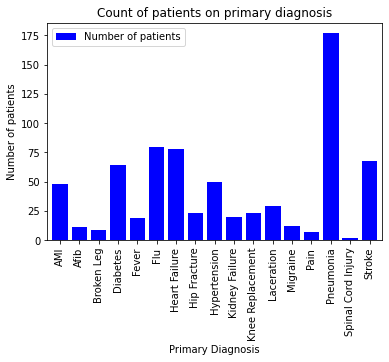

In [34]:
grouped_df = df_Dis.groupby("PrimaryDiagnosis").size()
grouped_df.plot(kind="bar", color="blue", width=0.8, label="Number of patients")
plt.xlabel("Primary Diagnosis")
plt.ylabel("Number of patients")
plt.title("Count of patients on primary diagnosis")
plt.legend()
plt.show()





<span style="color:#00008B;"> Q13 Create a bar chart on service & expected length of stay. <span>

In [ ]:
grouped_df = df_Dis.groupby("Service")["ExpectedLOS"].mean()
grouped_df.plot(kind="bar", color="blue", width=0.8, label="Expected Length Of Stay")
plt.xlabel("Service")
plt.ylabel("ExpectedLOS")
plt.title("ExpectedLOS by Service")
plt.legend()
plt.show()


<span style="color:#00008B;"> Q14. Find the count of Spanish Speaking patients. <span>

In [ ]:
count = df_PA['Language'].value_counts()['Spanish']
print(count)


<span style="color:#00008B;">  Q15. Create a boxplot on ExpectedLOS by taking service into account. <span>

In [ ]:
df_Dis.boxplot(column='ExpectedLOS', by='Service')
plt.title('Expected Length of Stay by Service')
plt.xlabel('Service')
plt.ylabel('Expected Length of Stay')
plt.show()


<span style="color:#00008B;"> Q16. Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups). <span>

In [ ]:
grouped = df_Pro.groupby('ProviderSpecialty')
for name, group in grouped:
    print(name)

<span style="color:#00008B;"> Q17: Connect to sql and write a query to get Ambulatory visit record's year. (Attach screenshots for this question) <span>

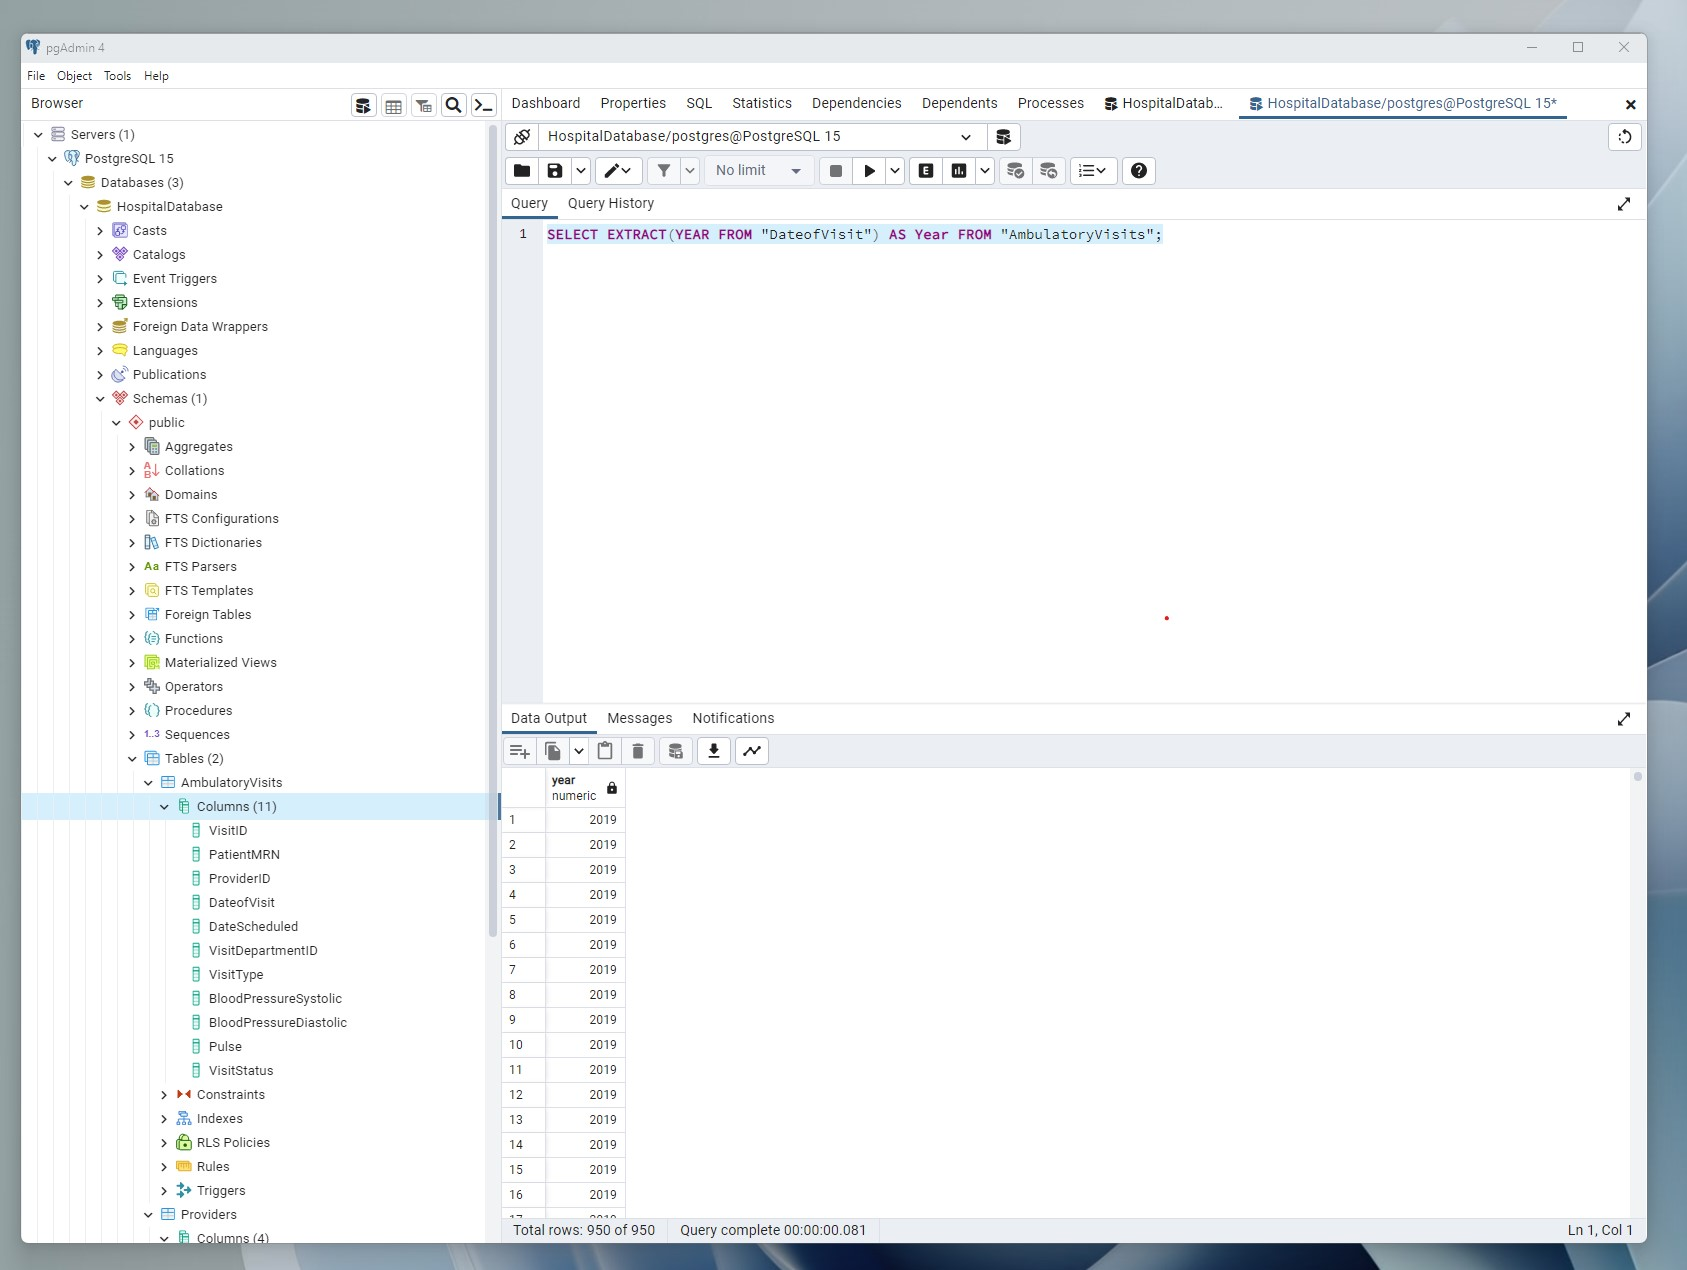

<span style="color:#00008B;"> Q18.Display using a donut chart the patient count in the ReAdmissionRegistry <span>

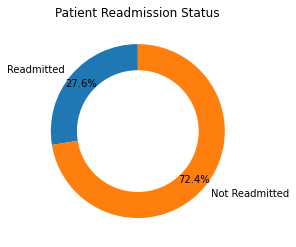

In [35]:
# Count the number of patients with readmission flag = 1
num_patients = df_ReAd[df_ReAd['ReadmissionFlag'] == 1]['PatientID'].count()

# Create a DataFrame with the counts for the chart
df_chart = pd.DataFrame({'Readmitted': num_patients, 'Not Readmitted': df_ReAd['PatientID'].nunique() - num_patients}, index=[''])

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(df_chart.values.flatten(), labels=df_chart.columns, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Patient Readmission Status')
plt.show()

<span style="color:#00008B;"> Q19 Show the records where the ExpectedLos is greater than the difference between the max and min ExpectedLos. <span>

In [38]:
max_los = df_Dis['ExpectedLOS'].max()
min_los = df_Dis['ExpectedLOS'].min()

filtered_df = df_Dis[df_Dis['ExpectedLOS'] > (max_los - min_los)]

print(filtered_df)







     AdmissionID  PatientID AdmissionDate           DischargeDate  \
12           398        134    2018-01-10 2018-01-15 16:43:47.026   
24           368        178    2018-01-14 2018-01-18 13:44:53.072   
31           369        198    2018-01-15 2018-01-31 14:28:07.437   
36           406        230    2018-01-18 2018-02-01 20:55:30.903   
47           174        352    2018-01-29 2018-02-02 21:21:45.388   
87           295        560    2018-02-13 2018-02-26 18:17:22.826   
92           297        588    2018-02-15 2018-02-26 14:46:54.780   
101          691        709    2018-02-21 2018-03-01 08:44:33.655   
110          549          8    2018-01-01 2018-01-07 15:39:25.987   
119          252         19    2018-01-01 2018-01-17 14:13:23.627   
127          550         27    2018-01-02 2018-01-13 07:34:46.603   
140          391         41    2018-01-03 2018-01-10 00:57:05.440   
157          609         59    2018-01-04 2018-01-09 01:18:34.182   
179          144         83    201

<span style="color:#00008B;"> Q20 Using a bar chart, which Service had the lowest count of Expected Mortality? <span>

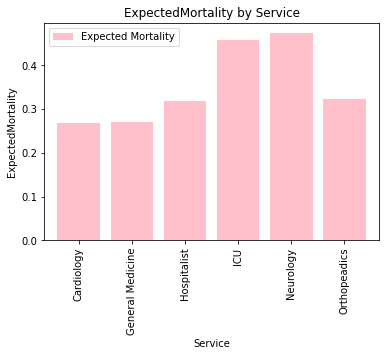

In [40]:
grouped_df = df_Dis.groupby("Service")["ExpectedMortality"].mean()
grouped_df.plot(kind="bar", color="pink", width=0.8, label="Expected Mortality")
plt.xlabel("Service")
plt.ylabel("ExpectedMortality")
plt.title("ExpectedMortality by Service")
plt.legend()
plt.show()



<span style="color:#00008B;"> Q21. Which reason of visit has maximum mortality rate.. 

In [41]:
#Loading a excel file into a DataFrame
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")
m = df["ExpectedMortality"].max()
print("Maximum Mortality :")
print(m)
print("\n'Reason for visit' which shows maximum mortality rate : ")
r = df["PrimaryDiagnosis"].where(df["ExpectedMortality"] == m)
new_df = r.dropna()
print(new_df)

Maximum Mortality :
0.9899452598970535

'Reason for visit' which shows maximum mortality rate : 
88    Pneumonia
Name: PrimaryDiagnosis, dtype: object


<span style="color:#00008B;">  Q22 Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy)  </span>

In [66]:
#Loading a excel file into a DataFrame
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")

g1 = df.groupby("Service")

icu = g1.get_group('ICU')
neurology = g1.get_group('Neurology')
hospitalist = g1.get_group('Hospitalist')
orthopeadics = g1.get_group('Orthopeadics')
cardiology = g1.get_group('Cardiology')
general_medicine = g1.get_group('General Medicine')

Nuerology_Loc_mean = neurology['ExpectedLOS'].mean()
Hospitalist_Loc_mean = hospitalist['ExpectedLOS'].mean()
Orthopeadics_Loc_mean = orthopeadics['ExpectedLOS'].mean()
Cardiology_Loc_mean = cardiology['ExpectedLOS'].mean()
General_Medicine_Loc_mean = general_medicine['ExpectedLOS'].mean()
Icu_Loc_mean = icu['ExpectedLOS'].mean()

g2 = df.groupby("DischargeDisposition")

expired = g2.get_group('Expired')
home = g2.get_group('Home')
transfer = g2.get_group('Transfer')

Expired_Loc_mean = expired['ExpectedLOS'].mean()
Home_Loc_mean = home['ExpectedLOS'].mean()
Home_Loc_mean = transfer['ExpectedLOS'].mean()

data1 = {
  "Service": ["Cardiology","ICU","Neurology","Hospitalist","Orthopeadics","General Medicine"],
  "Average": [Cardiology_Loc_mean,Icu_Loc_mean,Nuerology_Loc_mean ,Hospitalist_Loc_mean ,Orthopeadics_Loc_mean,General_Medicine_Loc_mean]
}

df1 = pd.DataFrame(data1)
print("Average LOS based on Service:\n") 
print(df1)

data2 = {
  "DischargeDisposition": ["Expired","Home","Transfer"],
  "Average": [Expired_Loc_mean,Home_Loc_mean,Home_Loc_mean]
}

df2 = pd.DataFrame(data2)
print("\nAverage LOS based on DischargeDisposition:\n") 
print(df2)

Average LOS based on Service:

            Service    Average
0        Cardiology  12.231596
1               ICU  12.656630
2         Neurology  11.195596
3       Hospitalist   7.818382
4      Orthopeadics   3.586373
5  General Medicine   6.090473

Average LOS based on DischargeDisposition:

  DischargeDisposition   Average
0              Expired  8.387274
1                 Home  8.864248
2             Transfer  8.864248


<span style="color:#00008B;">  Q23 Add column 'Age' in Patient table.  </span>

In [44]:
import datetime as DT
import io

df =pd.read_excel("HospitalDatabase.xlsx","Patients")
# Using DataFrame.insert() to add a column
now = pd.Timestamp('now')
df.insert(5,"Age",(now - df['DateOfBirth']).astype('<m8[Y]'))
df['Age'] = df['Age'].astype('int64')
print(df.head())

   PatientID FirstName LastName             DateOfBirth Gender  Age   Race  \
0          1     Lanni      Sue 1960-01-01 00:00:00.000   Male   63  White   
1          2       Far    Myers 1985-11-15 02:08:42.090   Male   37  White   
2          3   Devlin   Michael 1976-04-15 02:52:09.762   Male   47  White   
3          4   Carmine    Texas 1968-10-15 03:32:13.635   Male   54  White   
4          5     Tann      Bama 1962-05-01 19:12:58.950   Male   60  White   

  Language  
0  English  
1  English  
2  English  
3  English  
4  English  


<span style="color:#00008B;">   Q24 Using arrays and loops, find the count of patients based on gender. </span>

method 1

In [67]:
df =pd.read_excel("HospitalDatabase.xlsx","Patients")
# pandas count distinct values in column
c = df['Gender'].value_counts()
print(c)

Male      537
Female    408
Name: Gender, dtype: int64


method 2

In [68]:
df =pd.read_excel("HospitalDatabase.xlsx","Patients")
countm = 0
countf = 0
for i in df['Gender']:
    if(i=="Male"):
        countm+=1
    else:
        countf+=1

print("Males :",countm)
print("Females :",countf)


Males : 537
Females : 408


<span style="color:#00008B;">  Q25 Create bins to segregate Patients with 'Mild Hypertension','Moderate ','High Hypertension', 'Severe Hypertension'. Create a new column to show your analysis.  </span>

In [47]:
df = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits",usecols=['PatientMRN','BloodPressureSystolic','BloodPressureDiastolic'])

# creating a function bp that has systole and
# diastole as parameters
df["BP_Analysis"]='null'
print("\nIterating over rows using index attribute :\n")
  
# iterate through each row 
for i in range(len(df)):
    
      if((float(df.loc[i,'BloodPressureSystolic']) < 120) and (float(df.loc[i,'BloodPressureDiastolic'])<80)):
            df.loc[i,"BP_Analysis"] = 'Mild Hypertension'
    
  
      elif ((float(df.loc[i,'BloodPressureSystolic'])>=120) & (float(df.loc[i,'BloodPressureDiastolic'])<130) and (float(df.loc[i,'BloodPressureDiastolic'])<80)):
            df.loc[i,"BP_Analysis"] = 'Moderate'
   
      elif ((float(df.loc[i,'BloodPressureSystolic'])>=130) and (float(df.loc[i,'BloodPressureSystolic'])<140) or (float(df.loc[i,'BloodPressureDiastolic'])>=80) and (float(df.loc[i,'BloodPressureDiastolic'])<=89)):
             df.loc[i,"BP_Analysis"] = 'High Hypertension'
     
      else:
            df.loc[i,"BP_Analysis"] ='Severe Hypertension'
print(df.head())


Iterating over rows using index attribute :

   PatientMRN  BloodPressureSystolic  BloodPressureDiastolic  \
0         840                  188.0              144.143427   
1         820                  179.0              118.876808   
2         879                  133.0               98.749563   
3         884                  132.0               98.001270   
4          32                  131.0               85.115632   

           BP_Analysis  
0  Severe Hypertension  
1  Severe Hypertension  
2    High Hypertension  
3    High Hypertension  
4    High Hypertension  


<span style="color:#00008B;">  Q26 Plot a graph to show the distribution of expected mortality.  </span>

Solution:1

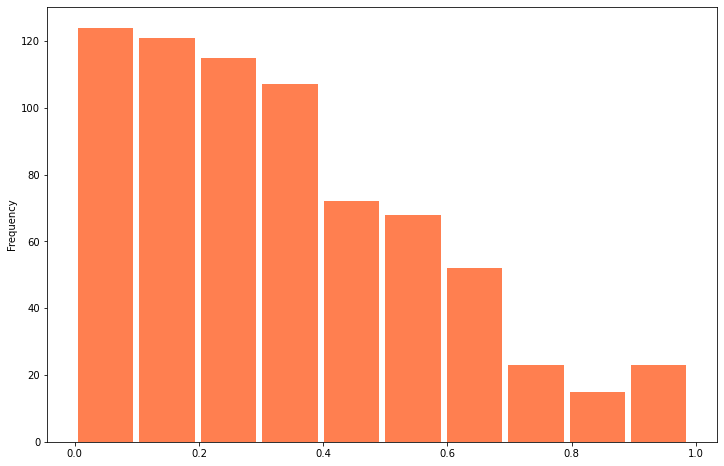

In [75]:
#Loading a excel file into a DataFrame
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")
df["ExpectedMortality"].plot(figsize=(12,8), kind = 'hist', color="coral", zorder=2, rwidth=0.9)
plt.show()

Solution:2

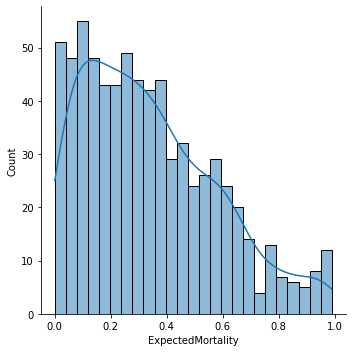

In [78]:
#Using seaborn distribution plot
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")
sns.displot(df["ExpectedMortality"],kde=True,bins=25)
plt.show()

<span style="color:#00008B;">   Q27 . Which departmentID has maximum number of visits scheduled. </span>

In [83]:
df =pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
print("Department ID with maximum number of visits scheduled :")
id = df['VisitDepartmentID'].max()
print(id)

Department ID with maximum number of visits scheduled :
12


<span style="color:#00008B;">   Q28 Find the visit type with maximum 'No Show'. </span>

In [84]:
df_am =pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits",usecols=['VisitType','VisitStatus'])

g1 = df_am.groupby(['VisitType','VisitStatus'])['VisitStatus'].count()
#print(group)

df_count = df_am.groupby('VisitType')['VisitStatus'].apply(lambda x: (x=='No Show').sum()).reset_index(name="'NoShow' count")
print(df_count)

print( "\n\nThe visit type with maximum 'No Show' :\n")

maximum = df_count.max()
print(maximum)

      VisitType  'NoShow' count
0     Follow Up              41
1           New               0
2      Physical              39
3  Telemedicine              74


The visit type with maximum 'No Show' :

VisitType         Telemedicine
'NoShow' count              74
dtype: object


<span style="color:#00008B;">   Q29 Which demographic patients are prone to get stroke? </span>

In [59]:

df_pa = pd.read_excel("HospitalDatabase.xlsx","Patients",usecols=['Gender','Race','Language'])
df_re = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry",usecols=['PrimaryDiagnosis','PatientID'])
g = df_re.groupby(['PrimaryDiagnosis'])
df_stroke = g.get_group('Stroke')
#count_of_stoke_patients = len(df_stroke.index)
#print("Patients id's Diagnosed with Stroke:\n\n",df_stroke)
#print("\n\nTotal count of Patients id's Diagnosed with Stroke:\n\n",count_of_stoke_patients)
df_final = df_stroke.join(df_pa)
#print(df_final.to_string())
prone_to_stroke = df_final.groupby(['Gender','Race','Language'])
prone_to_stroke_count = df_final.groupby(['Gender','Race','Language'])['PatientID'].apply(lambda x: x.count()).reset_index(name="PatientCount")
print(prone_to_stroke_count)
print("\n\nDemographic of patients  who are more  prone to get stroke :\n")
x = prone_to_stroke_count.max()['PatientCount']
maximum =prone_to_stroke_count.loc[ prone_to_stroke_count['PatientCount']== x]
print(maximum)

   Gender                    Race Language  PatientCount
0  Female  Black/African-American  English            14
1  Female  Black/African-American  Spanish             3
2  Female                   White  English             8
3  Female                   White  Spanish             6
4    Male  Black/African-American  English            19
5    Male  Black/African-American  Spanish             5
6    Male                   White  English            11
7    Male                   White  Spanish             2


Demographic of patients  who are more  prone to get stroke :

  Gender                    Race Language  PatientCount
4   Male  Black/African-American  English            19


<span style="color:#00008B;">  30 Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery. </span>

In [85]:
df  = pd.read_excel("HospitalDatabase.xlsx","Providers")
df2 = df.loc[(df['ProviderID']> 11) & (df['ProviderID']< 20) & (df['ProviderSpecialty'] == 'Surgery')]
print(df2)

    ProviderID     ProviderName ProviderSpecialty     ProviderDateOnStaff
11          12         Sarah Ab           Surgery 1998-08-18 05:22:40.762
12          13  Abigail Marriot           Surgery 1998-11-08 12:25:45.705
13          14          Dave Yu           Surgery 1999-06-26 16:18:57.436
14          15  Christian Saint           Surgery 2000-08-27 00:12:40.326
15          16     Perry Pardon           Surgery 2001-02-13 11:49:17.862


<span style="color:#00008B;">  Q31 If patient's gender is Female, add Ms.to the name and for male patients add Mr. to the name. </span>

In [86]:
df =pd.read_excel("HospitalDatabase.xlsx","Patients")
df.loc[ df["Gender"] == 'Female', "FirstName"] = 'Ms. '+df["FirstName"]
df.loc[ df["Gender"] == 'Male', "FirstName"] = 'Mr. '+df["FirstName"]
pd.options.display.max_rows = 1000 #print 1000 rows
print(df.head())

   PatientID    FirstName LastName             DateOfBirth Gender   Race  \
0          1    Mr. Lanni      Sue 1960-01-01 00:00:00.000   Male  White   
1          2      Mr. Far    Myers 1985-11-15 02:08:42.090   Male  White   
2          3  Mr. Devlin   Michael 1976-04-15 02:52:09.762   Male  White   
3          4  Mr. Carmine    Texas 1968-10-15 03:32:13.635   Male  White   
4          5    Mr. Tann      Bama 1962-05-01 19:12:58.950   Male  White   

  Language  
0  English  
1  English  
2  English  
3  English  
4  English  


<span style="color:#00008B;">  32 Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.</span>

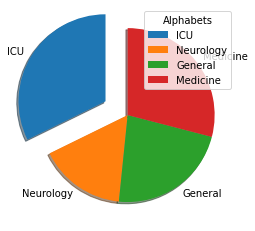

In [87]:
#Creating Pie Charts
# creating dataframe

dic = {"ExpectedLOS":[10,5,7,9],"Service": ["ICU", "Neurology", "General", "Medicine"]}
df = pd.DataFrame(dic)
myexplode=[0.3,0,0,0]
mycolors=["red","black","green","Blue"]

# plot a Pie Chart 
plt.pie(df["ExpectedLOS"],labels = df["Service"],shadow= True,startangle=90,explode=myexplode)
plt.legend(title="Alphabets")
plt.show()

<span style="color:#00008B;">  33 Plot a graph to show the distribution of expected length of stay.</span>

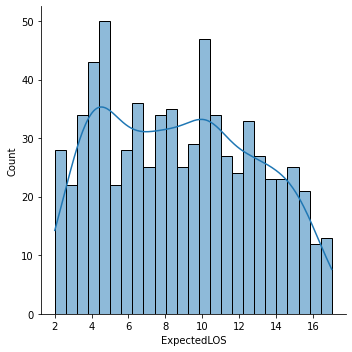

In [92]:
#Using seaborn distribution plot
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")
sns.displot(df["ExpectedLOS"],kde=True,bins=25)
plt.show()

<span style="color:#00008B;"> 34 Create a WordCloud Chart with Reason For Visit. </span>

(-0.5, 1599.5, 799.5, -0.5)

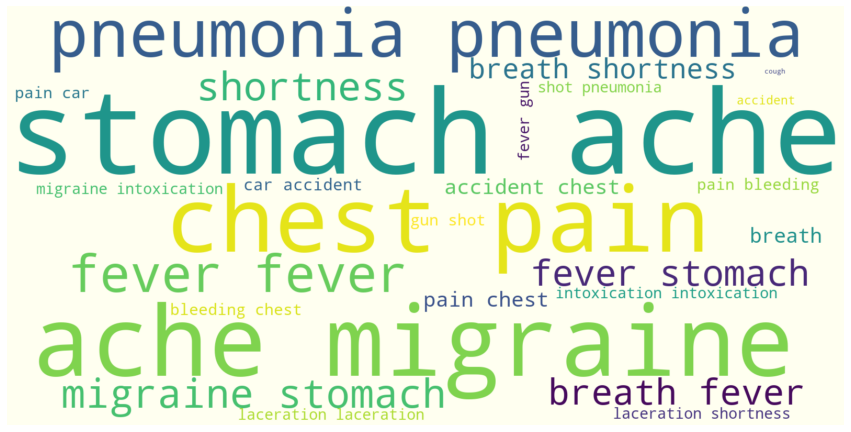

In [98]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Optional helpful plot stypes:
plt.style.use('bmh') #setting up 'bmh' as "Bayesian Methods for Hackers" style sheet
plt.style.use('ggplot') #R ggplot stype
df = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
#df['ReasonForVisit'] = df['ReasonForVisit'].fillna(value="")
word_string=" ".join(df['ReasonForVisit'].str.lower())
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="ivory", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), interpolation="bilinear")
plt.axis('off') 

<span style="color:#00008B;">  35 np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30. When the value is less than 6, print as -1,else print 99.</span>

In [99]:
arr = np.arange(1,31).reshape(6,5)
print("\nBeofre Slicing the 2D array: \n")
print(arr) # 2D array
print("\nAfter Slicing the 2D array: \n")
arr1 =[arr[0,3:],arr[4,3:],arr[5,3:]]
arr2 =np.array(arr1)
print(arr2)
l=[]
print("\nWhen the value is less than 6, print as -1,else print 99: \n")
for x in arr2:
    for y in x:
        
        if(y<6):
            y=-1
            l.append(y)
        else:
            y=99
            l.append(y)
 
arr3 = np.array(l)
newarr = arr3.reshape(3,2)
print(newarr)


Beofre Slicing the 2D array: 

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]

After Slicing the 2D array: 

[[ 4  5]
 [24 25]
 [29 30]]

When the value is less than 6, print as -1,else print 99: 

[[-1 -1]
 [99 99]
 [99 99]]


<span style="color:#00008B;"> 36 Retrieve the count of patients who are prone to hypertension crisis. (SBP>180 & DBP>120) </span>

In [100]:
df =pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
df1 = df.loc[(df['BloodPressureSystolic']> 180) & (df['BloodPressureDiastolic']< 120)]
#TO retrieve count of patients
c= len(df1.index)
print("The count of patients who are prone to hypertension crisis:\n")
print(c)

The count of patients who are prone to hypertension crisis:

12


<span style="color:#00008B;">  37 Display the data where actual LOS is greater than expected LOS.</span>

In [101]:
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")

#insert new column 'ActualLOS' to 'Discharges' sheet.

df.insert(8,"ActualLOS",(df['DischargeDate'] - df['AdmissionDate']) / np.timedelta64(1, 'D'))
#print(df.head())

# Display the data where actual LOS is greater than expected LOS.

df1 = df.loc[(df['ActualLOS'] > df['ExpectedLOS'])]
print(df1.head())

   AdmissionID  PatientID AdmissionDate           DischargeDate  \
1          257         93    2018-01-06 2018-01-18 02:59:04.667   
4          258        103    2018-01-07 2018-01-15 13:32:36.157   
5          395        109    2018-01-07 2018-01-22 17:57:37.103   
6          396        115    2018-01-08 2018-01-17 02:19:05.623   
7          259        116    2018-01-08 2018-01-20 03:40:53.605   

  DischargeDisposition     Service PrimaryDiagnosis  ExpectedLOS  ActualLOS  \
1              Expired  Cardiology       Broken Leg     6.816558  12.124360   
4              Expired  Cardiology       Broken Leg     2.639297   8.564307   
5              Expired  Cardiology              Flu     2.981758  15.748346   
6              Expired  Cardiology              Flu     4.959098   9.096593   
7              Expired  Cardiology       Broken Leg     2.279624  12.153398   

   ExpectedMortality  
1           0.628827  
4           0.055468  
5           0.192976  
6           0.254923  
7      

<span style="color:#00008B;"> 38 Using loc, retrieve the firstname and lastname of patients between indices 101 and 200. </span>

In [102]:
df =pd.read_excel("HospitalDatabase.xlsx","Patients")
df1 = df.loc[(df['PatientID']> 101) & (df['PatientID']< 200)]
#TO retrieve subset of columns from a dataframe
fl_name = df1[["FirstName", "LastName"]]
print(fl_name)

      FirstName     LastName
101       Gipsy     Frankton
102      Jethro       Wharin
103         Viv      Aylward
104       Swift    Dreschler
105       Fadel   Jacquemard
106      Myrtia          Pow
107      Damian      Anthill
108  Christiano       Bonhan
109       Jewel   Philipsson
110      Devlin   Stonehewer
111      Kellen       Bonhan
112      Shaine      MacLeod
113       Swift      Breagan
114      Zonnya     Frankton
115     Gerhold          Inc
116     Blondie          Inc
117   Kristofer      Scupham
118        Tann      Murcutt
119      Shaine        Tuson
120      Granny     Prandoni
121       Hilll         Nock
122   Pollyanna       Mochan
123      Lucila      McGrann
124         Mia          Inc
125      Zonnya       Machon
126     Blondie          Inc
127       Fadel      Maseres
128     Gerhold       Kneath
129       Lanni       Angear
130       Richy      McGrann
131  Christiano   Matevosian
132       Cally        Group
133       Borer   Stonehewer
134       Call

<span style="color:#00008B;"> 39 Delete the column 'DischargeDispostion' iteratively. </span>

In [103]:
# Create a dataframe from a dict
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")
print("\nThe DataFrame object before deleting the column\n")
print(df.head())
df1 = df.drop('DischargeDisposition',axis=1)
print("\nThe DataFrame object after deleting the column DischargeDisposition\n")
print(df1.head())


The DataFrame object before deleting the column

   AdmissionID  PatientID AdmissionDate           DischargeDate  \
0            1          9    2018-01-01 2018-01-07 18:06:06.408   
1          257         93    2018-01-06 2018-01-18 02:59:04.667   
2          152        101    2018-01-07 2018-01-11 16:16:06.782   
3          361        102    2018-01-07 2018-01-15 04:48:33.134   
4          258        103    2018-01-07 2018-01-15 13:32:36.157   

  DischargeDisposition     Service PrimaryDiagnosis  ExpectedLOS  \
0              Expired  Cardiology              AMI     9.646857   
1              Expired  Cardiology       Broken Leg     6.816558   
2              Expired  Cardiology   Kidney Failure     6.580273   
3              Expired  Cardiology             Afib    12.794536   
4              Expired  Cardiology       Broken Leg     2.639297   

   ExpectedMortality  
0           0.061540  
1           0.628827  
2           0.573887  
3           0.222163  
4           0.055468  


<span style="color:#00008B;"> 40 Create a jointplot on expected mortality & expected length of stay. </span>

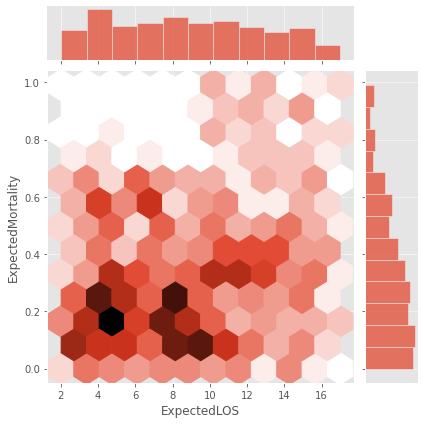

In [104]:
# loading dataset
df =pd.read_excel("HospitalDatabase.xlsx","Discharges")
  
# draw jointplot with
# hex kind
sns.jointplot(x = "ExpectedLOS", y = "ExpectedMortality",
              kind = "hex", data = df)
# show the plot
plt.show()
  

<span style="color:#00008B;"> Qs 41: Find the age prone to get stroke. </span>

In [105]:
df_stroke = df_ReAd[['PatientID', 'PrimaryDiagnosis']].loc[df_ReAd.PrimaryDiagnosis == 'Stroke']
df_stroke 
#calculating age
df_age = pd.DataFrame(df_PA.PatientID)
now = pd.Timestamp('now')
df_age ['Age'] = (now - df_PA['DateOfBirth']).astype('<m8[Y]')
df_age .sort_values('Age')
df_strokeAge = df_age.merge(df_stroke , how = 'inner')[['Age','PrimaryDiagnosis']]
#df_strokeAge ['AgeRange'] = pd.cut(x=df_strokeAge ['Age'], bins=[35, 45, 55, 65])
df_strokeAge  = df_strokeAge .groupby('Age')['PrimaryDiagnosis'].count().sort_values(ascending = False)
df_strokeAge 
print('The age', df_strokeAge.index[0], 'prone to stroke')

The age 58.0 prone to stroke


<span style="color:#00008B;"> Qs 42: Calculate mortality by diagnosis. </span>

In [106]:
mortalitycount = df_Dis[['DischargeDisposition', 'PrimaryDiagnosis']].loc[df_Dis.DischargeDisposition == 'Expired'].groupby('PrimaryDiagnosis').count() 
mortalitycount
patient_count = len(df_Dis)
patient_count
mortality_diagnosis = mortalitycount/patient_count
print(mortality_diagnosis)



                    DischargeDisposition
PrimaryDiagnosis                        
AMI                             0.008333
Afib                            0.005556
Broken Leg                      0.004167
Diabetes                        0.012500
Fever                           0.005556
Flu                             0.015278
Heart Failure                   0.022222
Hip Fracture                    0.004167
Hypertension                    0.022222
Kidney Failure                  0.002778
Knee Replacement                0.002778
Laceration                      0.002778
Pain                            0.001389
Pneumonia                       0.022222
Spinal Cord Injury              0.002778
Stroke                          0.009722


<span style="color:#00008B;"> Qs 43: Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive. </span>

In [107]:
df_PA['FL'] = df_PA['FirstName'].str.contains('lau',case=False)| df_PA['LastName'].str.contains('lau',case=False)
(df_PA[(df_PA['FL']==True)])


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,FL
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English,True
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English,True
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English,True
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English,True
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English,True
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English,True
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English,True
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English,True
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English,True
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English,True


<span style="color:#00008B;"> Qs 44: Display data by splitting age in 4 quartiles and labeling the quartiles. </span>

       Age
0.25  43.0
0.50  49.0
0.75  56.0
1.00  63.0


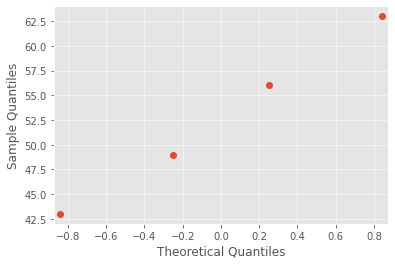

In [115]:
import numpy as np
import statsmodels.api as sm
import pylab as py
age_quant= pd. DataFrame()
now = pd.Timestamp('now')
age_quant['Age'] = (now - pd.to_datetime(df_PA['DateOfBirth'], format='%m%d%y')).astype('<m8[Y]')
age_quant
age_quant1 = age_quant.quantile([.25, .5, .75 , 1.00])
print(age_quant1)

split_quantiles = np.array(age_quant1)    
  
sm.qqplot(split_quantiles)

py.show()

<span style="color:#00008B;"> Qs 45: Usage of Enumeration in Python with any example. </span>

In [116]:
for ind, column in enumerate(df_Pro):
     print(ind, column)
    
    

0 ProviderID
1 ProviderName
2 ProviderSpecialty
3 ProviderDateOnStaff


<span style="color:  #00008B;"> Qs 46: Count of canceled status. </span>

In [117]:
canceled_status = len(df_AmbV[df_AmbV['VisitStatus'] == 'Canceled'])

print("Number of patients whose visit status are canceled: ",canceled_status)

Number of patients whose visit status are canceled:  60


<span style="color:#00008B;"> Qs 47: Display the patient details with maximum pulse pressure. </span>

In [118]:
df1 = pd.merge(df_ED,df_PA, on ='PatientID')
df_47 = pd.merge(df1,df_AmbV, left_on ='PatientID' ,right_on = 'PatientMRN') 
df_47 ['Maximum Pulse Pressure'] = df_AmbV.apply(lambda x: x['BloodPressureSystolic'] - x['BloodPressureDiastolic'], axis=1)
df_47[['FirstName', 'LastName', 'Maximum Pulse Pressure']].max()


FirstName                    Zulauf
LastName                      kundt
Maximum Pulse Pressure    70.149837
dtype: object

<span style="color:#00008B;"> Qs 48:  Create a heat map to show the correlation between the column values of Edvisits. </span>

<AxesSubplot:title={'center':'Correlation Heatmap'}>

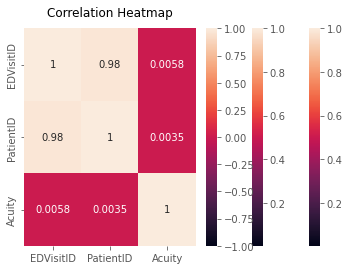

In [119]:
import seaborn as sns
df_ED = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
df_ED.corr()
sns.heatmap(df_ED.corr());
sns.heatmap(df_ED.corr()).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
sns.heatmap(df_ED.corr(), vmin=-1, vmax=1, annot=True)


<span style="color:#00008B;"> Qs 49:  Plot a graph by counting the no. of patients in each department. </span>

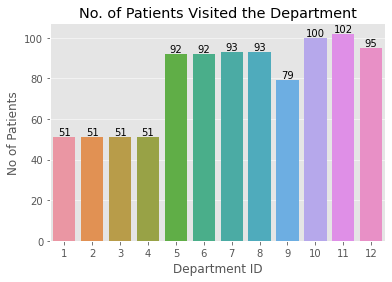

In [120]:
PI=sns.countplot(x='VisitDepartmentID',data=df_AmbV)
PI.bar_label(PI.containers[0],label_type='edge')
plt.title('No. of Patients Visited the Department')
plt.xlabel('Department ID') and plt.ylabel('No of Patients')

plt.show()


<span style="color:#00008B;"> Qs 50:  Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more. </span>

In [128]:
reasonforvisit = df_ED[['PatientID', 'ReasonForVisit', 'Acuity']].loc[((df_ED['ReasonForVisit'] == 'Migraine') | (df_ED['ReasonForVisit'] == 'Pneumonia')) & (df_ED['Acuity'] >= 2)]
reasonforvisit.head()

,PatientID,ReasonForVisit,Acuity
1,12,Migraine,2
3,14,Migraine,3
11,29,Pneumonia,2
12,30,Pneumonia,3
13,31,Pneumonia,4


A total of 215 patients with a acuity of more than 2 were diagnosed with either Migraine or Pneumonia.

<span style="color:#00008B;"> Qs 51:  Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit. </span>

In [ ]:
df_lookup = df_ED.groupby(['ReasonForVisit'])['PatientID'].nunique().sort_values(ascending=False)
user_choice=input("What is your Reason for Visit :")
if user_choice.title() in df_lookup.keys():
    print(' The number of occurrences of your condition - ' + user_choice.title()+ ' is ' + str(df_lookup[user_choice.title()]))
else:
    print('We do not have your condition in our database')

<span style="color:#00008B;"> Qs 52  Using indexing , loc to retrieve the row with maximum BloodPressureSystolic. </span>

In [131]:
df_AmbV.loc[df_AmbV[df_AmbV['BloodPressureSystolic']==df_AmbV['BloodPressureSystolic'].max()].index]

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
236,933,884,27,2019-02-14,2019-01-22 19:26:49.163,12,Telemedicine,190.0,143.989174,74.976879,Completed
251,888,906,24,2019-03-31,2019-03-17 23:21:17.361,10,New,190.0,137.207999,52.666922,Completed
424,314,63,7,2019-04-05,2019-03-24 22:31:26.092,11,Telemedicine,190.0,121.539859,95.471260,Completed
432,740,892,31,2019-03-14,2019-03-11 15:08:33.963,8,Physical,190.0,145.343479,94.849021,Completed
677,929,880,23,2019-02-10,2019-01-22 13:32:14.549,8,Follow Up,190.0,144.313400,82.781940,Completed
869,839,857,12,2019-03-17,2019-02-23 09:05:43.676,8,Follow Up,190.0,130.997386,71.829542,Completed
934,482,866,14,2019-05-04,2019-04-13 07:54:49.580,5,New,190.0,124.736359,69.731779,Canceled


<span style="color:#00008B;"> Qs 53: Plot a graph by multiplotting on the same canvas . </span>

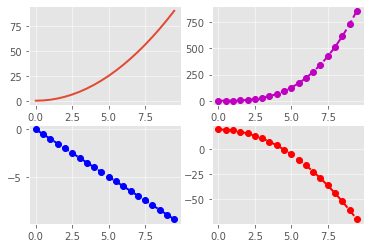

In [136]:
x =np.arange(0,10,0.5) 
y1 = x*x
y2= x*x*x
y3= -1*x
y4= -x*x +20
fig, axes = plt.subplots(2, 2)  
axes[0, 0].plot(x, y1, '-') 
axes[0, 1].plot(x, y2, 'm--o') 
axes[1, 0].plot(x, y3, 'b--o') 
axes[1, 1].plot(x, y4, 'r--o')

<span style="color:#00008B;"> Qs 54: Retrieve the row with minimum DBP using sorting technique. </span> 

In [137]:
df_AmbV.sort_values("BloodPressureDiastolic", ascending=True).head(1)
#df_AmbV.nsmallest(1, "BloodPressureDiastolic") (#smallest value function)


,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


<span style="color:#00008B;">Qs 55: Replace all the null values in ReadmissionFlag with 0. </span> 

In [138]:
df_ReAd = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
df_ReAd.fillna(value = 0,inplace = True)
# Show the DataFrame
df_ReAd.head()



,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,0.0,0.0
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,0.0,0.0


<span style="color:#00008B;">Qs 56: Get the list of patient ID's which are not there in ReadmissionRegistry. </span> 

In [139]:
df_patientnew = df_PA.copy()
df_patientnew['exists'] = np.nan
for x in list(df_patientnew.loc[df_patientnew.PatientID.isin(df_ReAd['PatientID'])].index):# loc gets rows (and/or columns) with particular labels
    df_patientnew['exists'].iloc[x] = 'Exists'

df_patientnew

df_notinReAd =df_patientnew[df_patientnew['exists'].isna()]
df_notinReAd[['PatientID']]


,PatientID
3,4
134,135
144,145
188,189
199,200
223,224
233,234
373,374
377,378
378,379


#### There are 241 Patient ID not present in ReAdmission Registry.

<span style="color:#00008B;">Qs 57: Find reasonForVisit with highest count of acuity 5 patients. </span> 

In [140]:
dq1= df_ED[df_ED['Acuity']==5]
max_acuity = dq1.groupby(df_ED['ReasonForVisit']).count().sort_values(by = 'Acuity', ascending = False)
max_acuity.head(1)

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
ReasonForVisit,,,,,,,
Chest Pain,61,61,61,61,61,61,61


<span style="color:#00008B;">Qs 58: Display full name of patients who are born in 1986.</span> 

In [141]:
patient_details = pd.DataFrame(df_PA[['FirstName','LastName','DateOfBirth']])

#Combining fullname in a single column
patient_details['FullName'] = patient_details[['FirstName','LastName']].apply(lambda x: ' '.join(x), axis=1)

#To extract year of birth from DOB
patient_details['YearOfBirth'] = pd.DatetimeIndex(patient_details['DateOfBirth']).year

# Display full name of patients who born in 1986
patient_DOB_1986= patient_details[patient_details['YearOfBirth'] == 1986][['FullName','YearOfBirth']]
print('There are 26 patients born in 1986')
patient_DOB_1986


There are 26 patients born in 1986


,FullName,YearOfBirth
23,Gabriel Joseph,1986
24,Lincoln Brenda,1986
29,Ala Halpert,1986
72,Lolita Darci,1986
164,Fadel Bernardt,1986
238,Bentley Kippax,1986
367,Vale Olanda,1986
373,Britt Dureden,1986
386,Cristabel Chatel,1986
415,Constantia Group,1986


<span style="color:#00008B;">Qs 59:Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.</span> 

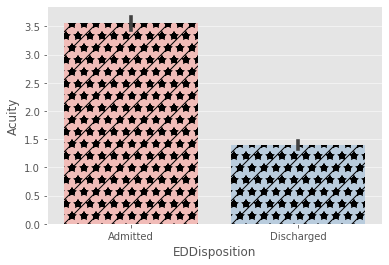

In [142]:
import seaborn as sns
import numpy as np
df_ED = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "EDVisits")
sns.barplot(y='Acuity',x='EDDisposition', palette = 'Pastel1', hatch='/o*',data=df_ED);


<span style="color:#00008B;"> Qs 60:Create a heat map on Readmission Registry table to find correlation between columns values.</span> 

<AxesSubplot:title={'center':'Correlation Heatmap'}>

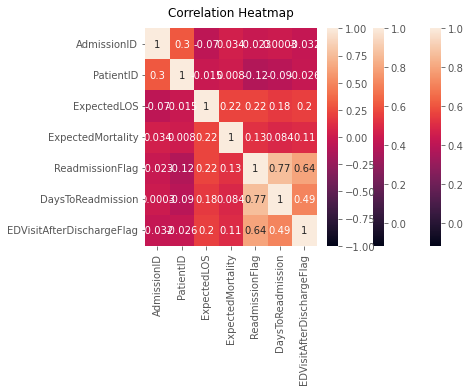

In [143]:
# import seaborn as sns
# df_ReAd = pd.read_excel("HospitalDatabase.xlsx", sheet_name = "ReAdmissionRegistry")
df_ReAd.corr()
sns.heatmap(df_ReAd.corr());
sns.heatmap(df_ReAd.corr()).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
sns.heatmap(df_ReAd.corr(), vmin=-1, vmax=1, annot=True)

<span style="color:#00008B;"> Q61. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17. </span> 

In [145]:
np.arange(1,31).reshape(6,5)[2:4,:2]

array([[11, 12],
       [16, 17]])

<span style="color:#00008B;"> 62.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the        value.</span> 

In [146]:
df_ED.groupby(['Acuity','EDDisposition'])['PatientID'].nunique()


Acuity  EDDisposition
1       Admitted          32
        Discharged       506
2       Admitted         112
        Discharged        66
3       Admitted          81
4       Admitted         103
        Discharged        30
5       Admitted         174
        Discharged        30
Name: PatientID, dtype: int64

   <span style="color:#00008B;"> 63.List male patients over the age of 60 who have undergone surgery from January-March 2019. </span>  

In [147]:
from datetime import datetime
from datetime import date


#Filter male patients
male_patients = df_PA.query("Gender == 'Male'")

# filter ambulatory by Surgery
Surgical_patients = pd.merge(df_AmbV,df_Pro,on ='ProviderID').query("ProviderSpecialty=='Surgery'")



#merge tables of male patients and date filtered surgical patients

Male_surgical_patients = pd.merge(male_patients,Surgical_patients, left_on ='PatientID' ,right_on = 'PatientMRN' )


#Create age field in Years - Age calculated on the basis of Visit date - This one results in 0 patients

#Male_surgical_patients ['Age'] = (Male_surgical_patients ['DateofVisit'] - Male_surgical_patients ['DateOfBirth'])/np.timedelta64(1, 'Y')


#Create age field in Years - Age calculated on the basis of today - This one results in 8 patients

Male_surgical_patients ['Age'] = (datetime.now() - Male_surgical_patients ['DateOfBirth'])/np.timedelta64(1, 'Y')


# filter by visit date 273 patients
start_date = '01/01/2019'
end_date ='03/31/2019'

Male_surgical_patients.query("DateofVisit >= @start_date & DateofVisit <= @end_date")[['Age','DateofVisit']]


#filter by Age

Male_surgical_patients.query("Age > 60")








,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,FL,VisitID,PatientMRN,...,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus,ProviderName,ProviderSpecialty,ProviderDateOnStaff,Age
2,15,Gabriel,Saint,1961-11-18 06:47:20.682,Male,White,Spanish,False,12,15,...,12,New,133.0,84.997205,62.342676,Completed,Sarah Ab,Surgery,1998-08-18 05:22:40.762,61.412198
5,19,Daugherty,Conner,1960-04-04 10:00:34.189,Male,White,Spanish,False,16,19,...,4,New,131.0,64.484534,72.506395,Completed,Perry Pardon,Surgery,2001-02-13 11:49:17.862,63.035409
20,533,Chaddy,Alekseev,1962-09-25 00:19:23.874,Male,Black/African-American,English,False,596,533,...,12,Physical,143.0,95.303929,63.937952,Completed,Abigail Marriot,Surgery,1998-11-08 12:25:45.705,60.561446
21,536,Derrek,Alekseev,1962-09-21 03:50:55.567,Male,Black/African-American,English,False,597,536,...,1,Physical,137.0,84.743808,82.525978,Completed,Dave Yu,Surgery,1999-06-26 16:18:57.436,60.571996
24,581,Constanta,Edgin,1960-06-06 08:19:25.534,Male,Black/African-American,English,False,380,581,...,7,Telemedicine,179.0,113.061708,84.869647,Completed,Kim Kimberly,Surgery,1998-05-10 14:47:29.468,62.863113
46,802,Berta,Loxly,1961-05-19 21:00:01.885,Male,White,English,False,164,802,...,8,Follow Up,NaN,NaN,NaN,Completed,Sarah Ab,Surgery,1998-08-18 05:22:40.762,61.911614
56,813,Kellsie,Tuttle,1963-01-21 16:48:47.209,Male,White,English,False,661,813,...,5,Physical,177.0,135.106109,50.634576,Completed,Abigail Marriot,Surgery,1998-11-08 12:25:45.705,60.236492
57,876,Gerty,Gheorghie,1962-03-08 09:17:10.706,Male,White,English,False,724,876,...,7,Telemedicine,142.0,86.553402,60.834514,No Show,Dave Yu,Surgery,1999-06-26 16:18:57.436,61.110743


<span style="color:#00008B;"> 64.Create a dataframe by splitting provider name to firstname and lastname with names for the columns. </span>

In [148]:
ProviderName =  pd.DataFrame([])

new = df_Pro["ProviderName"].str.split(" ", n = 1, expand = True)
 
# making separate first name column from new data frame
ProviderName["First Name"]= new[0]
 
# making separate last name column from new data frame
ProviderName["Last Name"]= new[1]

ProviderName  

,First Name,Last Name
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man


   <span style="color:#00008B;">  65.Plot a graph showing the count of patients for the reason visited the hospital.</span> 

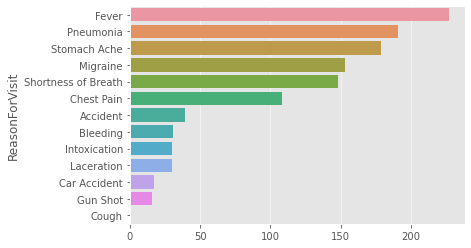

In [149]:
graph = df_ED.groupby(['ReasonForVisit'])['PatientID'].nunique().sort_values(ascending=False)
sns.barplot(y = graph.index, x = graph.values)
plt.show()

   <span style="color:#00008B;">  66. Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit. </span>

In [151]:
pd.merge(df_PA,df_EDU,on = 'PatientID',how ='inner')[['FirstName', 'LastName', 'DateOfBirth','ReasonForVisit']].query("ReasonForVisit == 'Migraine'")

,FirstName,LastName,DateOfBirth,ReasonForVisit
1,Far,Myers,1985-11-15 02:08:42.090,Migraine
2,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
11,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
13,Gan,Yu,1970-06-02 06:22:54.675,Migraine
21,Joesph,Long,1979-12-04 16:45:56.080,Migraine
23,Gabriel,Joseph,1986-05-31 09:36:05.716,Migraine
46,Cristen,Nock,1962-11-01 22:03:17.636,Migraine
48,Ashlee,Wharin,1969-05-14 19:28:02.619,Migraine
63,Harry,Florie,1968-12-20 00:34:28.879,Migraine
90,Viv,Inc,1979-11-13 12:05:00.192,Migraine


   <span style="color:#00008B;"> 67. Make a pivot table by the no. of patients from the admission date till discharge date.</span> 

In [152]:
#-------------------------------

#Select Data 

#Option 1: Patient count by days of Admission Date and Discharge Date - ENABLE ONLY ONE OPTION

#p_table = pd.pivot_table(df_Dis, index= ['DischargeDate'], columns = ['AdmissionDate'], values=['PatientID'], aggfunc = 'count',fill_value=0  )


#Option 2: Patient count by weeks of Admission Date and Discharge Date - ENABLE ONLY ONE OPTION

p_table = pd.pivot_table(df_Dis, index= pd.Grouper(freq='W', key='DischargeDate'), columns = pd.Grouper(freq='W', key='AdmissionDate'), values=['PatientID'], aggfunc = 'count',fill_value=0  )

#Option 3 : Pivot table as both AdmissionDate', 'DischargeDate' as indices

#p_table = pd.pivot_table(df_Dis, index= ['AdmissionDate', 'DischargeDate'], values='PatientID',aggfunc='count')

#--------------------------

# Render Pivot

#Option 1 - Only highest value of table is highlighted -  ENABLE ONLY ONE OPTION

#p_table.style.highlight_max(color = 'orange', axis = None)

#Option 2 - Higher values of each column highlighted -  ENABLE ONLY ONE OPTION

#p_table.style.highlight_max(color = 'orange', axis = 1)

#Option 3 -  Highlight lowest and higher values - ENABLE ONLY ONE OPTION

#p_table.style.highlight_min(color = 'yellow', axis = 1).highlight_max(color = 'orange', axis = 1)

#Option 4 - Highlight only non zero values - ENABLE ONLY ONE OPTION

p_table.style.highlight_between(left=1, right=100, axis = 1, color="#fff0b1").highlight_min(color = '#999999', axis = 1)  


##



   <span style="color:#00008B;"> 68. Calculate average LOS.  </span>

In [153]:
df_ReAd['ExpectedLOS'].mean()

8.824589159156156

   <span style="color:#00008B;"> 69. Number of patients on 'Transfer' based on primary diagnosis. </span>

In [154]:
df2 = df_ReAd.query("DischargeDisposition == 'Transfer'")

df2.groupby(['PrimaryDiagnosis']).size()


PrimaryDiagnosis
Afib                1
Diabetes            7
Flu                 2
Heart Failure       9
Knee Replacement    1
Laceration          1
Pain                1
Pneumonia           8
Stroke              9
dtype: int64

   <span style="color:#00008B;"> 70. Violin plot for Level of Acuity by Visit Reason.  </span>

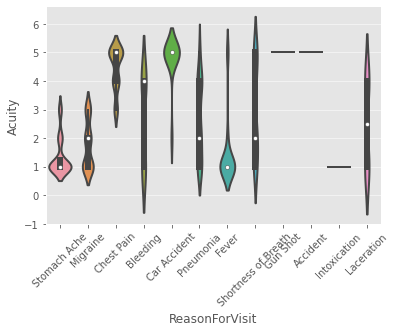

In [155]:
sns.violinplot(data=df_EDU,x='ReasonForVisit',y='Acuity')
plt.xticks(rotation=45)
plt.show()

   <span style="color:#00008B;"> 71. Find the count of White Spanish Male. </span> 

In [156]:
len(df_PA.query("Gender == 'Male'& Language =='Spanish' & Race == 'White'" ))


15

   <span style="color:#00008B;"> 72. Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?  </span>

In [157]:
LOS = pd.merge(df_ReAd.groupby(['PrimaryDiagnosis'])['ExpectedLOS'].min(),df_ReAd.groupby(['PrimaryDiagnosis'])['ExpectedLOS'].max(), right_index=True, left_index=True)
LOS ['difference'] = LOS['ExpectedLOS_y'] -LOS['ExpectedLOS_x']

print('The biggest difference between maximum and minumum LOS  is ' + str(round(LOS['difference'] .max(),2)) + ' which is for the primary diagnosis ' + str(LOS['difference'] .idxmax()))






The biggest difference between maximum and minumum LOS  is 14.83 which is for the primary diagnosis Pneumonia


   <span style="color:#00008B;"> 73. Which patient id has most entries in readmission registry. </span> 

In [158]:
df_ReAd['count']= df_ReAd.groupby(['PatientID']).size()
df_ReAd['count'].idxmax()




23

   <span style="color:#00008B;">  74. "Create a figure object called fig using plt.figure() **
 ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
 ** Plot (x,y) on that axes and set the labels.
 Note : You can plot on any x,y set of values." </span> 

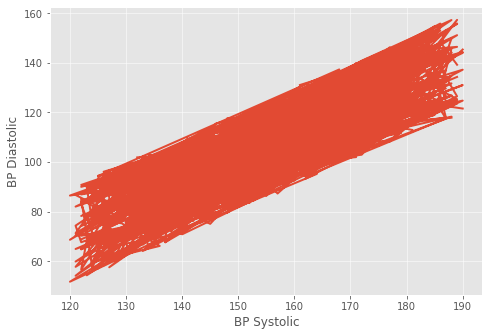

In [159]:
fig =plt.figure()
new_axis = fig.add_axes([0, 0, 1, 1])
x = df_AmbV['BloodPressureSystolic']
y = df_AmbV['BloodPressureDiastolic']
plt.plot(x,y)

plt.xlabel("BP Systolic")
plt.ylabel("BP Diastolic")

plt.show()


   <span style="color:#00008B;"> 75. "Using numpy functions, multiply the following arrays
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)" </span> 

In [160]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
c = np.multiply(a,b.reshape(2,3))
c

array([[ 0,  1,  4],
       [ 9, 16, 25]])

<span style="color:#00008B;">  76.Mortality O:E</span>

In [161]:
df_Dis.loc[ df_Dis["DischargeDisposition"] == 'Expired', "Observed Mortality"] = 1
df_Dis.loc[ df_Dis["DischargeDisposition"] != 'Expired', "Observed Mortality"] = 0
df_Dis["Mortality O:E"] = df_Dis["Observed Mortality"]/df_Dis["ExpectedMortality"]
print("The average Mortality O:E for all patients is " + str(round(df_Dis["Mortality O:E"].mean(),2)))

The average Mortality O:E for all patients is 1.69


   <span style="color:#00008B;">  77. Plot a graph to count the patients based on discharge disposition.</span> 

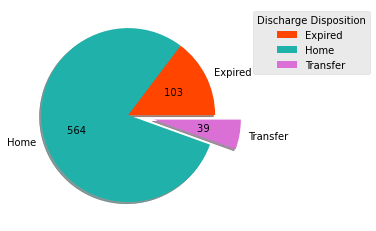

In [162]:
#1 - Extract patient count based on discharge disposition
series = pd.DataFrame(df_Dis.groupby('DischargeDisposition')['PatientID'].nunique()) 

#2 - extract unique discharge disposition values
mylabels = list(series.index)

#3 - extract the corresponding patient count
y = np.array(series.PatientID.values.tolist())

#------------------------------------------------------------

#4 - Creating Pie Chart

#4.1 Functions for autopct - Only enable one function at a time

#--------------------------------------
#a Only patient count actual- ENABLE this and disable #b function
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d} ".format(absolute)

#b  patient count in percentages and literal - ENABLE this and disable #a function
# def func(pct, allvals):
#     absolute = int(pct/100.*np.sum(allvals))
#     return "{:.1f}%\n({:d} )".format(pct, absolute)

#-------------------------------------


#4.2 Actual pie chart set up and plot

myexplode=[0,0,0.3]
mycolors=["orangered","lightseagreen","orchid"]


#-----------------
#4.3a plot with Patient count percentages - ONLY enable one plt.pie statement
#plt.pie(y,explode=myexplode,labels=mylabels,colors=mycolors,shadow= True,autopct='%1.2f%%')

#4.3b plot with no patient count labels and texture - ONLY enable one plt.pie statement
#plt.pie(y,explode=myexplode,labels=mylabels,colors=mycolors,shadow= True,hatch=['**O', 'oO', 'O.O'])

#4.3c plot with patient count number and/without percentages depending which function is enabled - ONLY enable one plt.pie statement
plt.pie(y,explode=myexplode,labels=mylabels,colors=mycolors,shadow= True,autopct=lambda pct: func(pct, y))

#----------------
# Always enabled
plt.legend(title="Discharge Disposition",bbox_to_anchor=(1.05, 1.0))
plt.show()



   <span style="color:#00008B;"> 78. Display total count of patients service wise based on gender.</span> 

In [163]:
df5 = pd.merge(df_PA,df_ReAd, on ='PatientID')
df5.groupby(['Gender','Service'])['PatientID'].nunique()


Gender  Service         
Female  Cardiology           41
        General Medicine    112
        Hospitalist          35
        ICU                  65
        Neurology            34
        Orthopeadics         22
Male    Cardiology           54
        General Medicine    149
        Hospitalist          64
        ICU                  86
        Neurology            31
        Orthopeadics         23
Name: PatientID, dtype: int64

   <span style="color:#00008B;">  79. Create a pivot table displaying average LOS based on Service and Primary Diagnosis.</span>

In [164]:
pd.pivot_table(df_Dis, index= ['Service'], columns = ['PrimaryDiagnosis'], values=['ExpectedLOS'],fill_value=0 )




ExpectedLOS                                            \
PrimaryDiagnosis         AMI       Afib Broken Leg  Diabetes     Fever   
Service                                                                  
Cardiology         12.414202  13.162920   3.911826  0.000000  0.000000   
General Medicine    0.000000   0.000000   3.368132  5.665298  6.803796   
Hospitalist        13.828290   0.000000   7.125069  7.874359  8.865651   
ICU                12.503213   9.651522   0.000000  0.000000  3.860693   
Neurology          10.482847   0.000000   0.000000  0.000000  0.000000   
Orthopeadics        0.000000   0.000000   0.000000  0.000000  0.000000   

                                                                    \
PrimaryDiagnosis       Flu Heart Failure Hip Fracture Hypertension   
Service                                                              
Cardiology        3.970428     13.014044     0.000000     0.000000   
General Medicine  6.141753      0.000000     0.000000     5.369365   
Hospitalist       7.033979      0.000000     0.000000     7.864913   
ICU               4.953871     12.784620     0.000000     5.092533   
Neurology         6.700593     12.737565     0.000000     4.276454   
Orthopeadics      0.000000      0.000000     3.474971     0.000000   

                                                                        \
PrimaryDiagnosis Kidney Failure Knee Replacement Laceration   Migraine   
Service                                                                  
Cardiology             6.580273         0.000000   0.000000   0.000000   
General Medicine       5.943163         0.000000   6.771154   0.000000   
Hospitalist            7.850346         2.255705   7.069360   0.000000   
ICU                    9.045995         0.000000  10.101443   0.000000   
Neurology              0.000000         0.000000   0.000000  12.202213   
Orthopeadics           0.000000         3.702839   0.000000   0.000000   

                                                                      
PrimaryDiagnosis       Pain  Pneumonia Spinal Cord Injury     Stroke  
Service                                                               
Cardiology         0.000000   0.000000            0.00000   0.000000  
General Medicine   0.000000   6.140270            0.00000   7.173333  
Hospitalist        0.000000   8.146240            0.00000  15.349671  
ICU                0.000000  13.523626           15.27654  13.297978  
Neurology         11.441453   7.527330            0.00000  12.745608  
Orthopeadics       0.000000   0.000000            0.00000   0.000000

   <span style="color:#00008B;">  80.Display the data for all 'White Female' patients above the age of 50.</span>

In [165]:
#Merge all data

df6 = pd.merge(df_ED,df_PA, on ='PatientID')
df7 = pd.merge(df6,df_AmbV, left_on ='PatientID' ,right_on = 'PatientMRN')
df8 = pd.merge(df7,df_ReAd, on ='PatientID')
df9 = pd.merge(df8,df_Dis, on ='PatientID')
df10 = pd.merge(df9,df_Pro, on ='ProviderID')
df11 = pd.merge(df10,df_EDU, on ='PatientID')


# Create an Age column
df11 ['Age'] = round((df11 ['DateofVisit'] - df11['DateOfBirth'])/np.timedelta64(1, 'Y'),2)



# Filter based on white female over 50 years
df11.query("Race=='White' & Gender == 'Female' & Age >50")

,EDVisitID_x,PatientID,VisitDate_x,EDDischargeTime_x,Acuity_x,ReasonForVisit_x,EDDisposition_x,FirstName,LastName,DateOfBirth,...,ProviderName,ProviderSpecialty,ProviderDateOnStaff,EDVisitID_y,VisitDate_y,EDDischargeTime_y,Acuity_y,ReasonForVisit_y,EDDisposition_y,Age
2,156,65,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,Admitted,Harry,Florie,1968-12-20 00:34:28.879,...,Ted Black,Pediatrics,1997-02-20 08:01:10.211,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.30
3,67,65,2020-01-01 17:53:30.192,2020-01-02 05:01:23.052,1,Stomach Ache,Discharged,Harry,Florie,1968-12-20 00:34:28.879,...,Ted Black,Pediatrics,1997-02-20 08:01:10.211,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.30
4,445,65,2020-01-06 10:34:45.949,2020-01-07 01:56:25.773,4,Laceration,Discharged,Harry,Florie,1968-12-20 00:34:28.879,...,Ted Black,Pediatrics,1997-02-20 08:01:10.211,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.30
5,156,65,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,Admitted,Harry,Florie,1968-12-20 00:34:28.879,...,Luke Long,Cardiology,2006-04-28 00:16:36.762,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.20
6,67,65,2020-01-01 17:53:30.192,2020-01-02 05:01:23.052,1,Stomach Ache,Discharged,Harry,Florie,1968-12-20 00:34:28.879,...,Luke Long,Cardiology,2006-04-28 00:16:36.762,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.20
7,445,65,2020-01-06 10:34:45.949,2020-01-07 01:56:25.773,4,Laceration,Discharged,Harry,Florie,1968-12-20 00:34:28.879,...,Luke Long,Cardiology,2006-04-28 00:16:36.762,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.20
8,156,65,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,Admitted,Harry,Florie,1968-12-20 00:34:28.879,...,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.33
9,67,65,2020-01-01 17:53:30.192,2020-01-02 05:01:23.052,1,Stomach Ache,Discharged,Harry,Florie,1968-12-20 00:34:28.879,...,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.33
10,445,65,2020-01-06 10:34:45.949,2020-01-07 01:56:25.773,4,Laceration,Discharged,Harry,Florie,1968-12-20 00:34:28.879,...,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,156,2020-01-02 17:52:00.856,2020-01-02 23:09:27.926,3,Migraine,admitted,50.33
68,34,34,2020-01-01 08:35:59.795,2020-01-02 03:44:28.185,5,Shortness of Breath,Discharged,Ted,Hue,1960-11-28 18:05:11.459,...,Ted Black,Pediatrics,1997-02-20 08:01:10.211,34,2020-01-01 08:35:59.795,2020-01-02 03:44:28.185,5,Shortness of Breath,discharged,58.27


**...................................................................................................................................................................................................................................................**

<span style="color:#00008B;">  </span>

<span style="color:#00008B;">  </span>